In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../../data/fuel-econ.csv')
print(df.shape)
df.head(10)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


### Example 1 - Default heat plot using `matplotlib.pyplot.hist2d()`

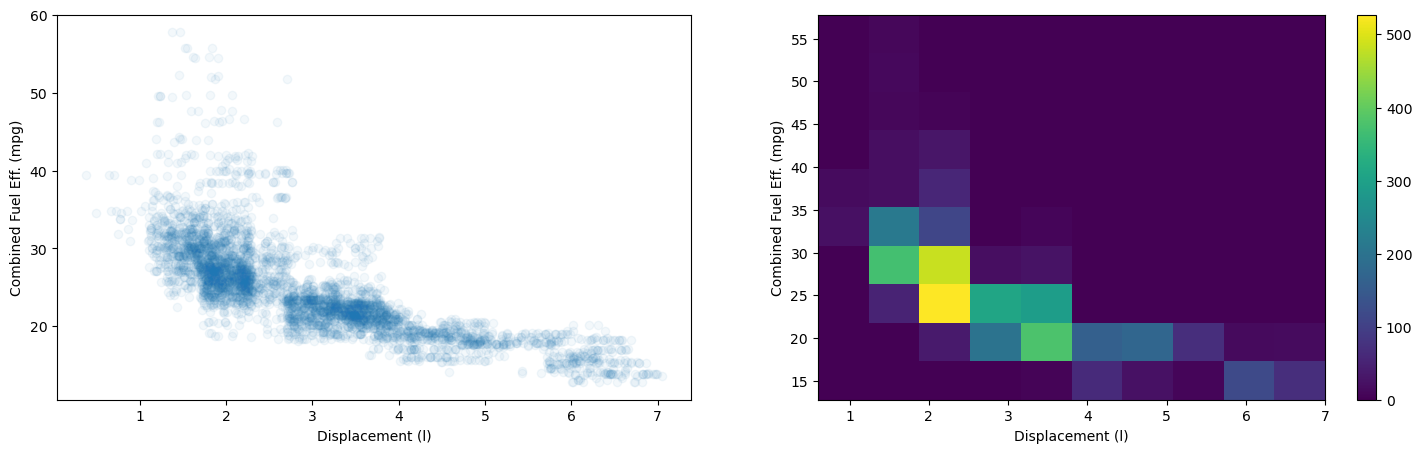

In [3]:
plt.figure(figsize = [18, 5])

# left plot: scatter plot of discrete data with jitter and transparency
plt.subplot(1, 2, 1)
sns.regplot(data = df, x = 'displ', y = 'comb', x_jitter = 0.3, scatter_kws = {'alpha' : 1/20}, fit_reg = False);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# right plot: heat map with bin edges between values
plt.subplot(1, 2, 2)
plt.hist2d(data = df, x = 'displ', y = 'comb');
plt.colorbar() # add a colorbar to the side of the plot
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Example 2 - Minimum bound on counts and reverse color map

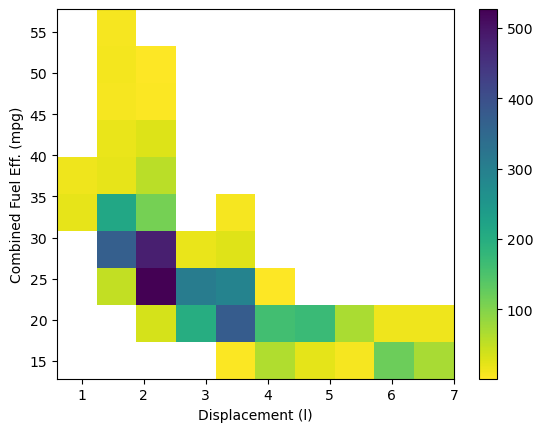

In [4]:
# Use cmin to set the minimum bound of counts that will be plotted
# Use cmap to reverse the color map.
plt.hist2d(data = df, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r'); # cmin = 0.5 eliminates bins with no counts; cmap = 'viridis_r' reverses the color map.
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Example 3 - Specify bin edges

In [5]:
df[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


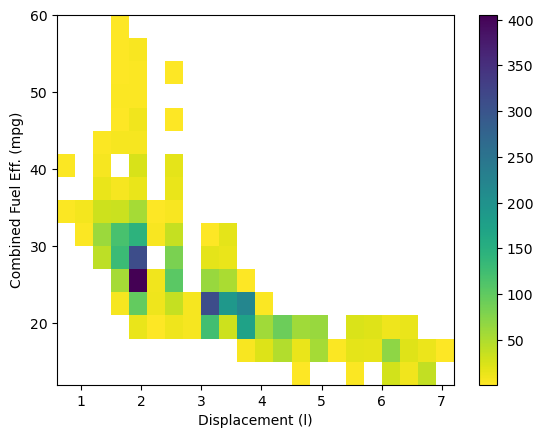

In [6]:
# Specify bin edges
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = df, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot

### Example 4 - Add text annotation on each cell with `pyplot.text()`

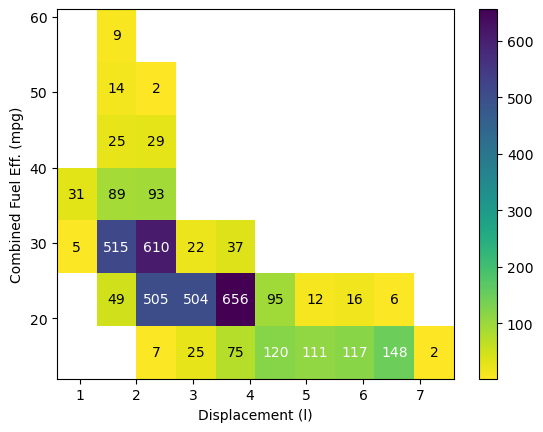

In [7]:
# Specify bin edges
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)

# Use cmin to set a minimum bound of counts
# Use cmap to reverse the color map.
h2d = plt.hist2d(data = df, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y]);

plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y.
# Values in x are histogrammed along the first dimension and
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100:
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c), ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c), ha = 'center', va = 'center', color = 'black')

### Example 5 - Other visualizations

Create a heat map of engine displacement vs. co2 production.

In [8]:
df[['displ', 'co2']].describe()

,displ,co2
count,3929.000000,3929.000000
mean,2.950573,376.564266
std,1.305901,92.338892
min,0.600000,29.000000
25%,2.000000,315.000000
50%,2.500000,369.000000
75%,3.600000,429.000000
max,7.000000,692.000000


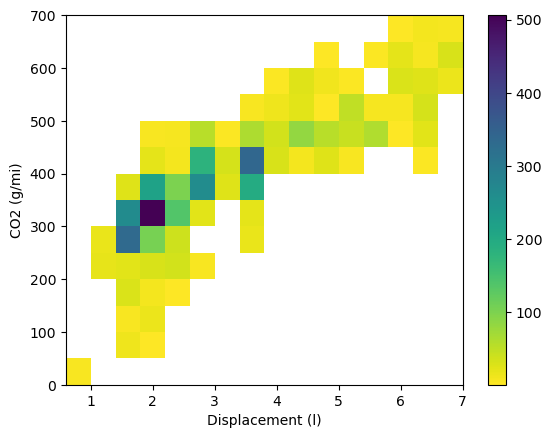

In [9]:
bins_x = np.arange(0.6, 7+0.4, 0.4)
bins_y = np.arange(0, 692+50, 50)
plt.hist2d(data = df, x = 'displ', y = 'co2', cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('CO2 (g/mi)');

In the heat map, I've set up a color map that goes from light to dark, and made it so that any cells without count don't get colored in. The visualization shows that most cars fall in a line where larger engine sizes correlate with higher emissions. The trend is somewhat broken by those cars with the lowest emissions, which still have engine sizes shared by most cars (between 1 and 3 liters).

### Example 6 - Multivariate example (three quantitative variables)

Before we had this plot.

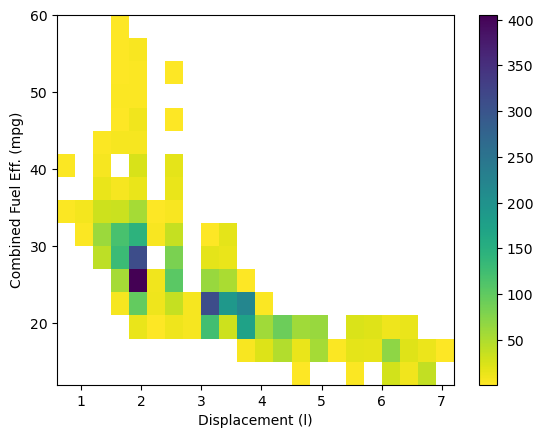

In [10]:
# Specify bin edges
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = df, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot

Now, let's consider applying color to our heatmap based on the $\text{CO}_\text{2}$ emissions. Each rectangle will reflect the color of the average $\text{CO}_\text{2}$ emissions of the vehicles in the bin.

Therefore, we must first find the data elements that fit into each bin. Next we will compute the average of the $\text{CO}_\text{2}$ emissions for that bin.

In [11]:
# Construct the bi-dimensional histogram that will act as the weights for the heat map
displ_bins = pd.cut(df['displ'], bins_x, right = False, include_lowest = False, labels = False) # use cut to place data into discrete bins
comb_bins = pd.cut(df['comb'], bins_y, right = False, include_lowest = False, labels = False) # use cut to place data into discrete bins

n_points = df.groupby([displ_bins, comb_bins]).size() # number of points in each bin
n_points = n_points.reset_index().pivot(index = 'displ', columns = 'comb').values # re-shape into a 2-d array

co2_weights = df['co2']/n_points[displ_bins, comb_bins] # compute weights

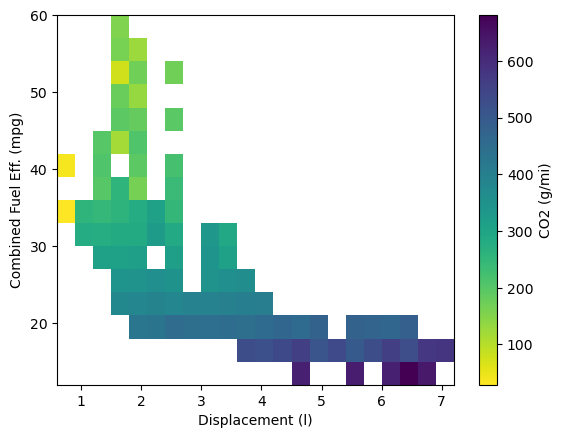

In [12]:
plt.hist2d(data = df, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y], weights=co2_weights);
plt.colorbar(label='CO2 (g/mi)')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Example 7 - Correlation matrix

In [13]:
df = pd.read_csv('../../../data/pokemon.csv')
df.head()
pokemon_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']

df[pokemon_stats].corr()

,hp,attack,defense,speed,special-attack,special-defense
hp,1.000000,0.433318,0.231540,0.169512,0.377446,0.367949
attack,0.433318,1.000000,0.435514,0.335289,0.325937,0.202138
defense,0.231540,0.435514,1.000000,-0.023866,0.199560,0.508688
speed,0.169512,0.335289,-0.023866,1.000000,0.440411,0.202847
special-attack,0.377446,0.325937,0.199560,0.440411,1.000000,0.481345
special-defense,0.367949,0.202138,0.508688,0.202847,0.481345,1.000000


<Axes: >

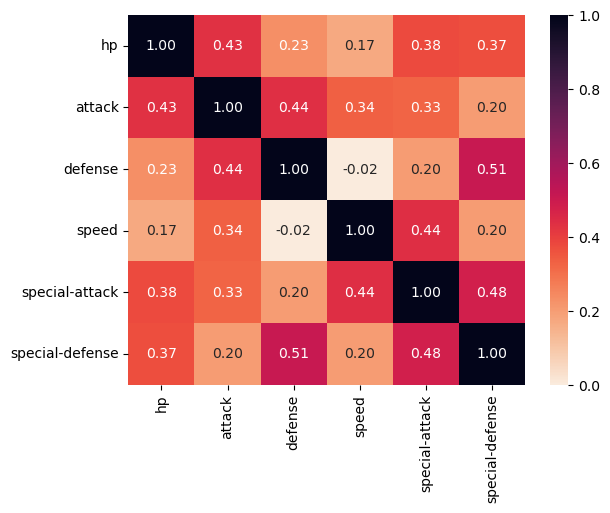

In [14]:
sns.heatmap(df[pokemon_stats].corr(), annot=True, cmap='rocket_r', fmt='.2f', vmin=0) # set vmin to 0 to remove negative values given only one small negative correlation